In [1]:
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/annotations.csv')

In [3]:
train_data.head(5)

Unnamed: 0   image_id  width  height   source      x      y      w      h
0           0  b6ab77fd7   1024    1024  usask_1  834.0  222.0   56.0   36.0
1           1  b6ab77fd7   1024    1024  usask_1  226.0  548.0  130.0   58.0
2           2  b6ab77fd7   1024    1024  usask_1  377.0  504.0   74.0  160.0
3           3  b6ab77fd7   1024    1024  usask_1  834.0   95.0  109.0  107.0
4           4  b6ab77fd7   1024    1024  usask_1   26.0  144.0  124.0  117.0

In [4]:
train_data['image_id'].value_counts()

35b935b6c    116
f1794c924    108
f79336a8e    104
134d4a01c    101
4cf91995d     97
            ... 
86296fc32      1
ce4124be0      1
4e6c05213      1
a5cb30c38      1
41457a646      1
Name: image_id, Length: 3373, dtype: int64

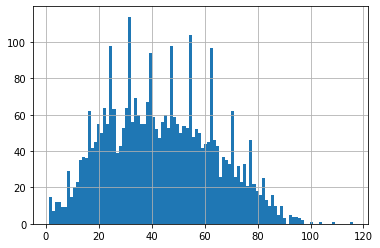

In [5]:
#number of boxes on image histogram
train_data['image_id'].value_counts().hist(bins=100)

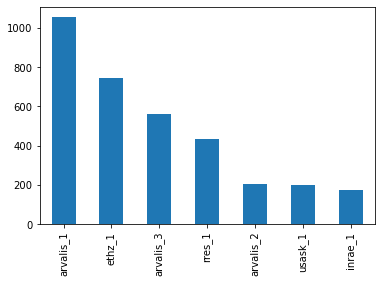

In [6]:
#source distribution
train_data.groupby('image_id')['source'].first().value_counts().plot(kind='bar')

In [7]:
!python utils/split_data.py --train_size=100 --proportion=0.85

Traceback (most recent call last):
  File "utils/split_data.py", line 6, in <module>
    from sklearn.model_selection import train_test_split
ModuleNotFoundError: No module named 'sklearn'


In [35]:
train_ids = pd.read_csv('data/train.txt', header=None)

In [36]:
train_ids.columns= ["image_id"]
train_ids.head(5)

image_id
0  03a242bd2
1  043a957ca
2  038432e90
3  03448724b
4  03d831c0d

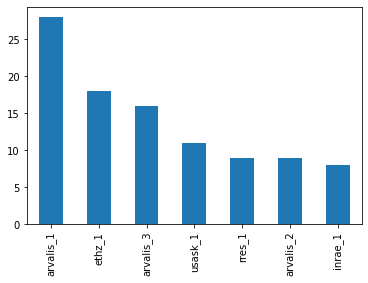

In [37]:
#region distribution in chosen data
partial_train_data = pd.merge(train_data, train_ids, how='inner', on='image_id')
partial_train_data.groupby('image_id')['source'].first().value_counts().plot(kind='bar')

load checkpoint from local path: experiments/faster_rcnn/r50_fpn/latest.pth


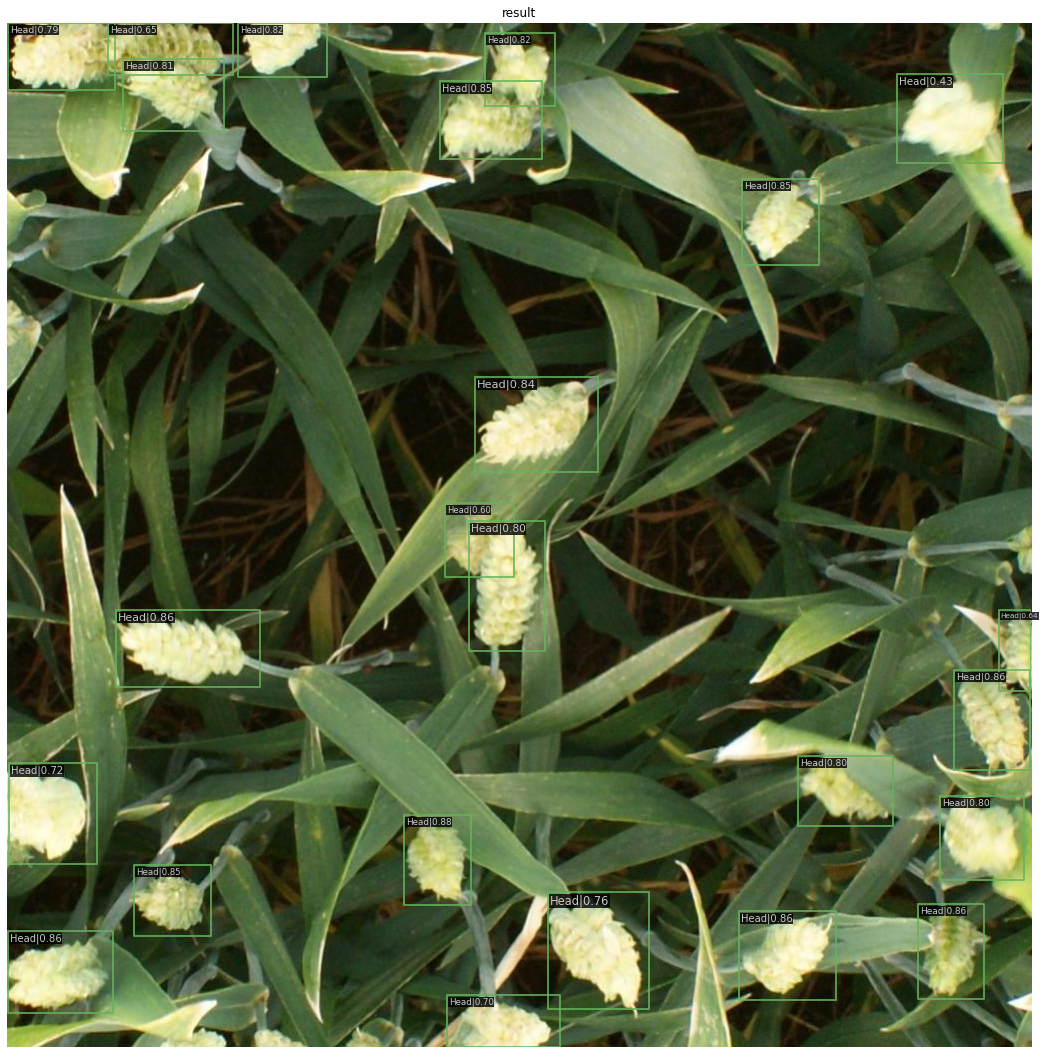

In [11]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

model = init_detector('configs/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_wheat.py', 'experiments/faster_rcnn/r50_fpn/latest.pth', device='cuda:0') 
img = 'data/test/2fd875eaa.jpg'
result = inference_detector(model, img)

show_result_pyplot(model, img, result, score_thr=0.3)

load checkpoint from local path: experiments/yolox/yolox_tiny/latest.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_backbone_stem_conv_conv_weight, ema_backbone_stem_conv_bn_weight, ema_backbone_stem_conv_bn_bias, ema_backbone_stem_conv_bn_running_mean, ema_backbone_stem_conv_bn_running_var, ema_backbone_stem_conv_bn_num_batches_tracked, ema_backbone_stage1_0_conv_weight, ema_backbone_stage1_0_bn_weight, ema_backbone_stage1_0_bn_bias, ema_backbone_stage1_0_bn_running_mean, ema_backbone_stage1_0_bn_running_var, ema_backbone_stage1_0_bn_num_batches_tracked, ema_backbone_stage1_1_main_conv_conv_weight, ema_backbone_stage1_1_main_conv_bn_weight, ema_backbone_stage1_1_main_conv_bn_bias, ema_backbone_stage1_1_main_conv_bn_running_mean, ema_backbone_stage1_1_main_conv_bn_running_var, ema_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_backbone_stage1_1_short_conv_conv_weight, ema_backbone_stage1_1_short_conv_bn_weight, ema_backbone_s

D:\apps\anaconda\envs\wheat-detection\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


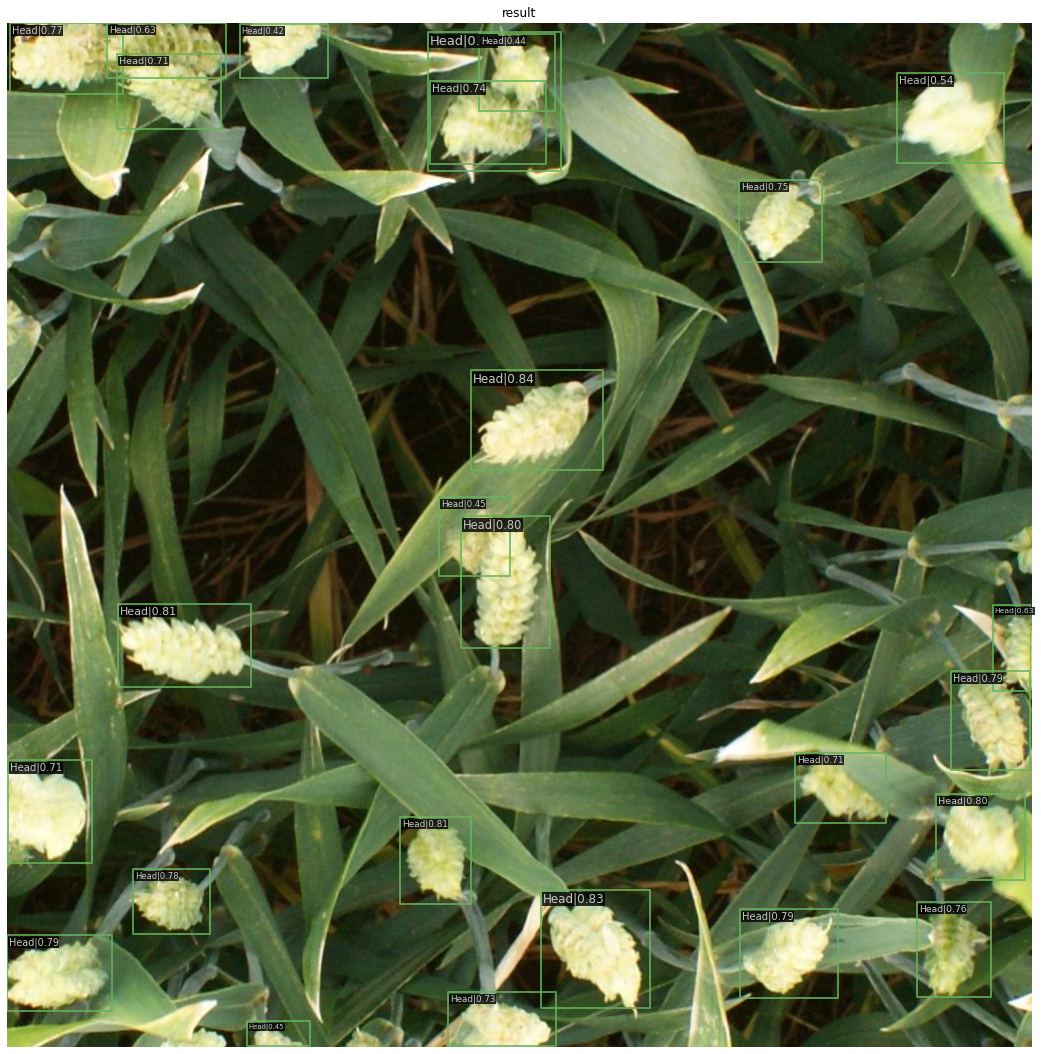

In [12]:
model = init_detector('configs/yolox/yolox_tiny_8x8_300e_wheat.py', 'experiments/yolox/yolox_tiny/latest.pth', device='cuda:0') 
img = 'data/test/2fd875eaa.jpg'
result = inference_detector(model, img)

show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
from model_search import faster_rcnn_model_search

faster_rcnn_model_search()

loading annotations for WheatDataset from model_search\faster_rcnn\train_0.txt...


D:\apps\anaconda\envs\wheat-detection\lib\site-packages\mmdet\datasets\custom.py:179: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


loading annotations for WheatDataset from model_search\faster_rcnn\train_1.txt...


D:\apps\anaconda\envs\wheat-detection\lib\site-packages\mmdet\datasets\custom.py:179: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


loading annotations for WheatDataset from model_search\faster_rcnn\train_2.txt...


D:\apps\anaconda\envs\wheat-detection\lib\site-packages\mmdet\datasets\custom.py:179: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

evaluating parameters:
{'backbone': 'ResNet50', 'loss_bbox': 'L1', 'lr': 0.01, 'momentum': 0.9, 'optimizer': 'SGD', 'scheduler': 'step', 'warmup': 'linear', 'warmup_speed': 'fast'}


2022-10-15 12:48:31,040 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations for WheatDataset from model_search\faster_rcnn\val_0.txt...


2022-10-15 12:48:55,172 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.pth
2022-10-15 12:48:55,336 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2022-10-15 12:48:55,342 - mmdet - INFO - Start running, host: nikta@DESKTOP-1L70PTM, work_dir: D:\proj

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 22.2 task/s, elapsed: 51s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 12:56:45,531 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 63979 | 0.926  | 0.903 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.903 |
+-------+-------+-------+--------+-------+
2022-10-15 12:56:45,565 - mmdet - INFO - Epoch(val) [1][1125]	AP50: 0.9030, mAP: 0.9032
2022-10-15 12:58:57,955 - mmdet - INFO - Epoch [2][100/338]	lr: 1.000e-02, eta: 0:11:00, time: 1.318, data_time: 0.090, memory: 18107, loss_rpn_cls: 0.0482, loss_rpn_bbox: 0.1219, loss_cls: 0.2917, acc: 87.1681, loss_bbox: 0.4789, loss: 0.9406
2022-10-15 13:02:49,193 - mmdet - INFO - Epoch [2][200/338]	lr: 1.000e-02, eta: 0:10:48, time: 2.313, data_time: 0.026, memory: 18107, loss_rpn_cls: 0.0469, loss_rpn_bbox: 0.1218, loss_cls: 0.2873, acc: 87.3047, loss_bbox: 0.4787, loss: 0.9346
2022-10-15 13:05:54,264 - mmdet - INFO - Epoch [2][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 21.6 task/s, elapsed: 52s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:07:51,978 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 59749 | 0.934  | 0.916 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.916 |
+-------+-------+-------+--------+-------+
2022-10-15 13:07:52,010 - mmdet - INFO - Epoch(val) [2][1125]	AP50: 0.9160, mAP: 0.9157
2022-10-15 13:10:32,451 - mmdet - INFO - Epoch [3][100/338]	lr: 1.000e-02, eta: 0:05:30, time: 1.599, data_time: 0.094, memory: 18107, loss_rpn_cls: 0.0407, loss_rpn_bbox: 0.1187, loss_cls: 0.2763, acc: 87.8001, loss_bbox: 0.4648, loss: 0.9005
2022-10-15 13:12:39,127 - mmdet - INFO - Epoch [3][200/338]	lr: 1.000e-02, eta: 0:03:09, time: 1.267, data_time: 0.025, memory: 18107, loss_rpn_cls: 0.0411, loss_rpn_bbox: 0.1172, loss_cls: 0.2743, acc: 87.9220, loss_bbox: 0.4664, loss: 0.8990
2022-10-15 13:14:55,164 - mmdet - INFO - Epoch [3][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 28.8 task/s, elapsed: 39s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:16:32,194 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 56652 | 0.929  | 0.912 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.912 |
+-------+-------+-------+--------+-------+
2022-10-15 13:16:32,221 - mmdet - INFO - Epoch(val) [3][1125]	AP50: 0.9120, mAP: 0.9119
2022-10-15 13:16:33,449 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations for WheatDataset from model_search\faster_rcnn\val_1.txt...


2022-10-15 13:16:49,382 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.pth
2022-10-15 13:16:49,459 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2022-10-15 13:16:49,463 - mmdet - INFO - Start running, host: nikta@DESKTOP-1L70PTM, work_dir: D:\proj

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 20.3 task/s, elapsed: 55s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:27:08,394 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48956 | 61153 | 0.923  | 0.901 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.901 |
+-------+-------+-------+--------+-------+
2022-10-15 13:27:08,423 - mmdet - INFO - Epoch(val) [1][1124]	AP50: 0.9010, mAP: 0.9010
2022-10-15 13:29:59,124 - mmdet - INFO - Epoch [2][100/338]	lr: 1.000e-02, eta: 0:13:46, time: 1.693, data_time: 0.087, memory: 18107, loss_rpn_cls: 0.0472, loss_rpn_bbox: 0.1226, loss_cls: 0.2914, acc: 87.1609, loss_bbox: 0.4819, loss: 0.9431
2022-10-15 13:32:38,069 - mmdet - INFO - Epoch [2][200/338]	lr: 1.000e-02, eta: 0:11:37, time: 1.598, data_time: 0.029, memory: 18107, loss_rpn_cls: 0.0471, loss_rpn_bbox: 0.1206, loss_cls: 0.2923, acc: 87.1316, loss_bbox: 0.4804, loss: 0.9404
2022-10-15 13:35:22,893 - mmdet - INFO - Epoch [2][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 16.3 task/s, elapsed: 69s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:38:07,115 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48956 | 58337 | 0.929  | 0.911 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.911 |
+-------+-------+-------+--------+-------+
2022-10-15 13:38:07,143 - mmdet - INFO - Epoch(val) [2][1124]	AP50: 0.9110, mAP: 0.9115
2022-10-15 13:42:05,780 - mmdet - INFO - Epoch [3][100/338]	lr: 1.000e-02, eta: 0:06:04, time: 2.372, data_time: 0.089, memory: 18107, loss_rpn_cls: 0.0416, loss_rpn_bbox: 0.1178, loss_cls: 0.2747, acc: 87.8440, loss_bbox: 0.4653, loss: 0.8994
2022-10-15 13:46:03,655 - mmdet - INFO - Epoch [3][200/338]	lr: 1.000e-02, eta: 0:03:44, time: 2.374, data_time: 0.029, memory: 18107, loss_rpn_cls: 0.0396, loss_rpn_bbox: 0.1170, loss_cls: 0.2715, acc: 88.0588, loss_bbox: 0.4621, loss: 0.8903
2022-10-15 13:49:10,236 - mmdet - INFO - Epoch [3][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 28.9 task/s, elapsed: 39s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:51:12,177 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48956 | 57044 | 0.930  | 0.914 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.914 |
+-------+-------+-------+--------+-------+
2022-10-15 13:51:12,206 - mmdet - INFO - Epoch(val) [3][1124]	AP50: 0.9140, mAP: 0.9139
2022-10-15 13:51:13,462 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations for WheatDataset from model_search\faster_rcnn\val_2.txt...


2022-10-15 13:51:28,185 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.pth
2022-10-15 13:51:28,337 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2022-10-15 13:51:28,341 - mmdet - INFO - Start running, host: nikta@DESKTOP-1L70PTM, work_dir: D:\proj

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 28.9 task/s, elapsed: 39s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 13:58:43,278 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 49884 | 63822 | 0.926  | 0.904 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.904 |
+-------+-------+-------+--------+-------+
2022-10-15 13:58:43,304 - mmdet - INFO - Epoch(val) [1][1124]	AP50: 0.9040, mAP: 0.9035
2022-10-15 14:01:28,593 - mmdet - INFO - Epoch [2][100/338]	lr: 1.000e-02, eta: 0:11:19, time: 1.647, data_time: 0.085, memory: 18107, loss_rpn_cls: 0.0484, loss_rpn_bbox: 0.1223, loss_cls: 0.2930, acc: 87.0728, loss_bbox: 0.4843, loss: 0.9480
2022-10-15 14:03:58,590 - mmdet - INFO - Epoch [2][200/338]	lr: 1.000e-02, eta: 0:09:49, time: 1.500, data_time: 0.020, memory: 18107, loss_rpn_cls: 0.0466, loss_rpn_bbox: 0.1204, loss_cls: 0.2891, acc: 87.2484, loss_bbox: 0.4798, loss: 0.9360
2022-10-15 14:07:09,218 - mmdet - INFO - Epoch [2][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 23.2 task/s, elapsed: 49s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 14:08:43,864 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 49884 | 59653 | 0.928  | 0.909 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.909 |
+-------+-------+-------+--------+-------+
2022-10-15 14:08:43,896 - mmdet - INFO - Epoch(val) [2][1124]	AP50: 0.9090, mAP: 0.9088
2022-10-15 14:10:48,663 - mmdet - INFO - Epoch [3][100/338]	lr: 1.000e-02, eta: 0:05:00, time: 1.242, data_time: 0.088, memory: 18107, loss_rpn_cls: 0.0401, loss_rpn_bbox: 0.1163, loss_cls: 0.2705, acc: 88.1110, loss_bbox: 0.4625, loss: 0.8895
2022-10-15 14:13:52,083 - mmdet - INFO - Epoch [3][200/338]	lr: 1.000e-02, eta: 0:03:03, time: 1.834, data_time: 0.020, memory: 18107, loss_rpn_cls: 0.0406, loss_rpn_bbox: 0.1178, loss_cls: 0.2756, acc: 87.8551, loss_bbox: 0.4672, loss: 0.9012
2022-10-15 14:18:56,369 - mmdet - INFO - Epoch [3][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 21.3 task/s, elapsed: 53s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 14:20:43,648 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 49884 | 59330 | 0.933  | 0.915 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.915 |
+-------+-------+-------+--------+-------+
2022-10-15 14:20:43,680 - mmdet - INFO - Epoch(val) [3][1124]	AP50: 0.9150, mAP: 0.9155


0.9150233333333334
evaluating parameters:
{'backbone': 'ResNet50', 'loss_bbox': 'IoULoss', 'lr': 0.01, 'momentum': 0.9, 'optimizer': 'SGD', 'scheduler': 'step', 'warmup': 'linear', 'warmup_speed': 'fast'}


2022-10-15 14:20:45,083 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations for WheatDataset from model_search\faster_rcnn\val_0.txt...


2022-10-15 14:21:09,626 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.pth
2022-10-15 14:21:09,799 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2022-10-15 14:21:09,807 - mmdet - INFO - Start running, host: nikta@DESKTOP-1L70PTM, work_dir: D:\proj

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 20.5 task/s, elapsed: 55s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 14:29:17,669 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 63998 | 0.926  | 0.904 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.904 |
+-------+-------+-------+--------+-------+
2022-10-15 14:29:17,708 - mmdet - INFO - Epoch(val) [1][1125]	AP50: 0.9040, mAP: 0.9035
2022-10-15 14:31:33,056 - mmdet - INFO - Epoch [2][100/338]	lr: 1.000e-02, eta: 0:11:19, time: 1.347, data_time: 0.095, memory: 18107, loss_rpn_cls: 0.0476, loss_rpn_bbox: 0.1219, loss_cls: 0.2921, acc: 87.1329, loss_bbox: 0.6330, loss: 1.0946
2022-10-15 14:33:50,326 - mmdet - INFO - Epoch [2][200/338]	lr: 1.000e-02, eta: 0:09:38, time: 1.373, data_time: 0.028, memory: 18107, loss_rpn_cls: 0.0459, loss_rpn_bbox: 0.1221, loss_cls: 0.2887, acc: 87.2639, loss_bbox: 0.6312, loss: 1.0879
2022-10-15 14:36:00,869 - mmdet - INFO - Epoch [2][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 17.3 task/s, elapsed: 65s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 14:37:57,644 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 60285 | 0.935  | 0.916 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.916 |
+-------+-------+-------+--------+-------+
2022-10-15 14:37:57,683 - mmdet - INFO - Epoch(val) [2][1125]	AP50: 0.9160, mAP: 0.9159
2022-10-15 14:42:37,686 - mmdet - INFO - Epoch [3][100/338]	lr: 1.000e-02, eta: 0:05:26, time: 2.786, data_time: 0.104, memory: 18107, loss_rpn_cls: 0.0408, loss_rpn_bbox: 0.1176, loss_cls: 0.2762, acc: 87.8174, loss_bbox: 0.6124, loss: 1.0469
2022-10-15 14:47:04,574 - mmdet - INFO - Epoch [3][200/338]	lr: 1.000e-02, eta: 0:03:29, time: 2.669, data_time: 0.037, memory: 18107, loss_rpn_cls: 0.0414, loss_rpn_bbox: 0.1167, loss_cls: 0.2733, acc: 87.9479, loss_bbox: 0.6136, loss: 1.0451
2022-10-15 14:52:54,338 - mmdet - INFO - Epoch [3][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 20.4 task/s, elapsed: 55s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 14:54:53,435 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48953 | 58848 | 0.932  | 0.914 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.914 |
+-------+-------+-------+--------+-------+
2022-10-15 14:54:53,470 - mmdet - INFO - Epoch(val) [3][1125]	AP50: 0.9140, mAP: 0.9138
2022-10-15 14:54:54,862 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations for WheatDataset from model_search\faster_rcnn\val_1.txt...


2022-10-15 14:55:19,733 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.pth
2022-10-15 14:55:19,916 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2022-10-15 14:55:19,923 - mmdet - INFO - Start running, host: nikta@DESKTOP-1L70PTM, work_dir: D:\proj

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 18.8 task/s, elapsed: 60s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 15:03:31,682 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48956 | 58677 | 0.917  | 0.896 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.896 |
+-------+-------+-------+--------+-------+
2022-10-15 15:03:31,715 - mmdet - INFO - Epoch(val) [1][1124]	AP50: 0.8960, mAP: 0.8960
2022-10-15 15:05:58,253 - mmdet - INFO - Epoch [2][100/338]	lr: 1.000e-02, eta: 0:11:29, time: 1.459, data_time: 0.092, memory: 18107, loss_rpn_cls: 0.0471, loss_rpn_bbox: 0.1222, loss_cls: 0.2936, acc: 87.0881, loss_bbox: 0.6312, loss: 1.0941
2022-10-15 15:10:14,690 - mmdet - INFO - Epoch [2][200/338]	lr: 1.000e-02, eta: 0:11:30, time: 2.562, data_time: 0.026, memory: 18107, loss_rpn_cls: 0.0472, loss_rpn_bbox: 0.1205, loss_cls: 0.2921, acc: 87.1179, loss_bbox: 0.6313, loss: 1.0912
2022-10-15 15:12:54,434 - mmdet - INFO - Epoch [2][300/338]	lr: 1.000e-02, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1124/1124, 19.3 task/s, elapsed: 58s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-10-15 15:14:44,228 - mmdet - INFO - 
+-------+-------+-------+--------+-------+
| class | gts   | dets  | recall | ap    |
+-------+-------+-------+--------+-------+
| Head  | 48956 | 58468 | 0.929  | 0.911 |
+-------+-------+-------+--------+-------+
| mAP   |       |       |        | 0.911 |
+-------+-------+-------+--------+-------+
2022-10-15 15:14:44,263 - mmdet - INFO - Epoch(val) [2][1124]	AP50: 0.9110, mAP: 0.9111
2022-10-15 15:16:56,688 - mmdet - INFO - Epoch [3][100/338]	lr: 1.000e-02, eta: 0:05:28, time: 1.318, data_time: 0.090, memory: 18107, loss_rpn_cls: 0.0421, loss_rpn_bbox: 0.1179, loss_cls: 0.2759, acc: 87.7959, loss_bbox: 0.6151, loss: 1.0510
